In [2]:
import rioxarray
import cf_xarray
import xarray as xr

## Reading a Dataset

The `gribberish` engine can be used to read a grib2 file into a dataset.

In [3]:
ds = xr.open_dataset('gfswave.20210826.t12z.atlocn.0p16.f000.grib2', engine='gribberish')
ds

<xarray.Dataset>
Dimensions:  (time: 1, lat: 331, lon: 301)
Coordinates:
  * time     (time) datetime64[ns] 2021-08-26T08:00:00
  * lat      (lat) float64 55.0 54.83 54.67 54.5 ... 0.3332 0.1666 -0.00011
  * lon      (lon) float64 260.0 260.2 260.3 260.5 ... 309.5 309.7 309.8 310.0
Data variables: (12/13)
    WDIR     (time, lat, lon) float64 ...
    HTSGW    (time, lat, lon) float64 ...
    WVHGT    (time, lat, lon) float64 ...
    UGRD     (time, lat, lon) float64 ...
    PERPW    (time, lat, lon) float64 ...
    WVPER    (time, lat, lon) float64 ...
    ...       ...
    WVDIR    (time, lat, lon) float64 ...
    SWDIR    (time, lat, lon) float64 ...
    VGRD     (time, lat, lon) float64 ...
    DIRPW    (time, lat, lon) float64 ...
    SWELL    (time, lat, lon) float64 ...
    WIND     (time, lat, lon) float64 ...
Attributes:
    meta:     created with gribberish

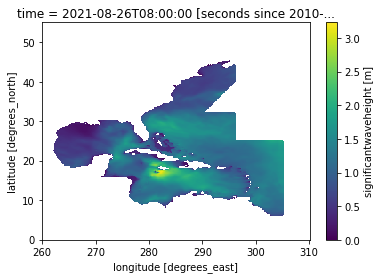

In [4]:
%matplotlib inline
ds['HTSGW'].plot()

# Projection

The `crs` attribute is set for each variable in the dataset, meaning it can be picked up by [`rioxarray`](https://corteva.github.io/rioxarray/stable/index.html). 

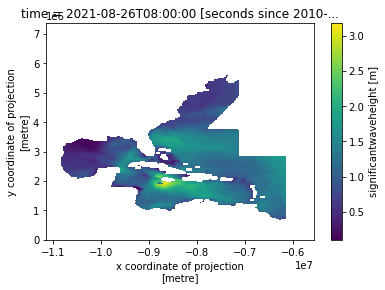

In [5]:
from rasterio.enums import Resampling

ds = ds.rio.reproject('EPSG:3857', resampling=Resampling.bilinear)
ds['HTSGW'].plot()